## 1. Pulling in dataset from the BlackFridaySales.csv file and doing Exploratory Data Analysis

### Importing all the required modules


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('BlackFridaySales.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Statistical info


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Datatype info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Finding unique values

In [12]:
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

### Checking the NULL values in the data

In [15]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Exploratory Data Analysis <br>
Exploratory data analysis and data visualization help us to check if the given data will help with the use cases(planned for prediction). Only if the relevant columns have a correlation, those will be helpful to predict/conclude the cases.


### Distplot for purchase

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

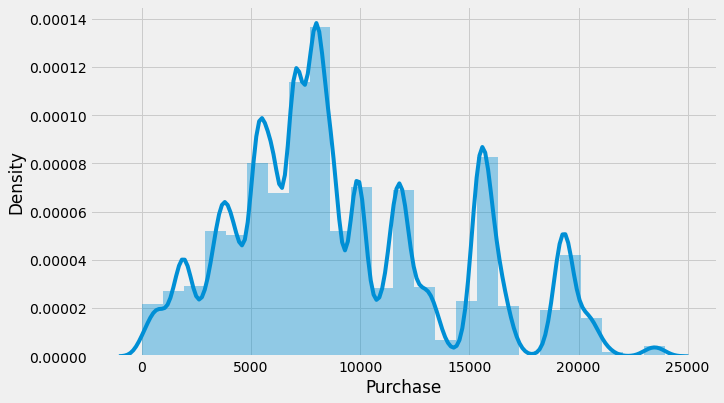

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
sns.distplot(df['Purchase'], bins=25)

### Distribution of numric variables for 'Gender'

<AxesSubplot:xlabel='Gender', ylabel='count'>

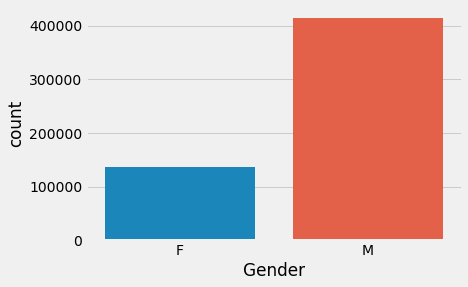

In [20]:
sns.countplot(df['Gender'])

### Plotting a count plot for 'Age'

<AxesSubplot:xlabel='Age', ylabel='count'>

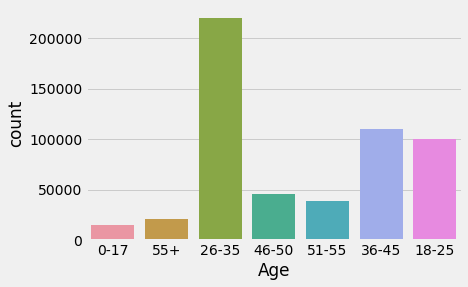

In [22]:
sns.countplot(df['Age'])

### Plotting a count plot for 'Marital_Status'

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

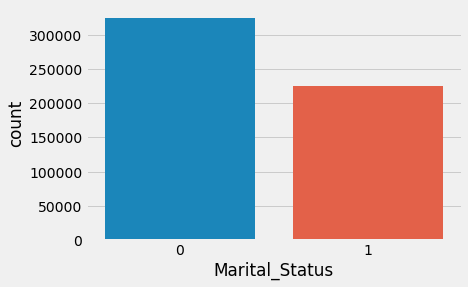

In [24]:
sns.countplot(df['Marital_Status'])

### Plotting a count plot for 'Occupation'

<AxesSubplot:xlabel='Occupation', ylabel='count'>

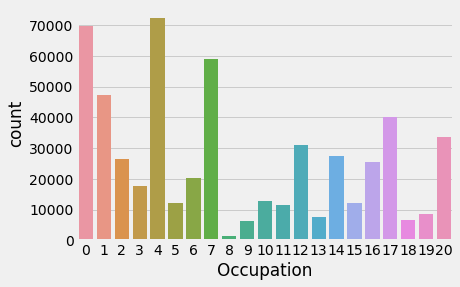

In [26]:
sns.countplot(df['Occupation'])

### Combining 'Age' and 'Gender'

<AxesSubplot:xlabel='Age', ylabel='count'>

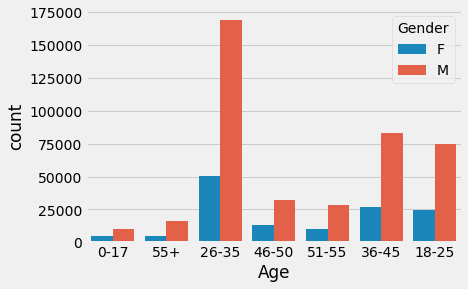

In [27]:
sns.countplot(df['Age'],hue=df['Gender'])

### Checking further - how many of the married males and married females attended the sales

In [29]:
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


<AxesSubplot:xlabel='Age', ylabel='count'>

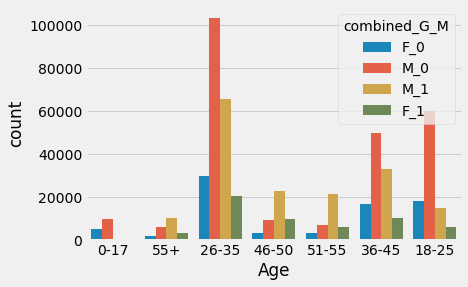

In [30]:
sns.countplot(df['Age'],hue=df['combined_G_M'])

### Plotting a count plot for 'City_Category'

<AxesSubplot:xlabel='City_Category', ylabel='count'>

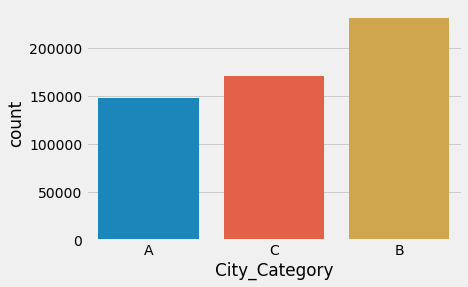

In [32]:
sns.countplot(df['City_Category'])

### Plotting a count plot for 'Stay_In_Current_City_Years'

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

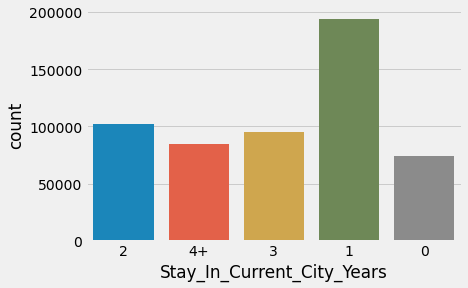

In [34]:
sns.countplot(df['Stay_In_Current_City_Years'])

### Plotting a count plot for 'Occupation'

<AxesSubplot:xlabel='Occupation', ylabel='count'>

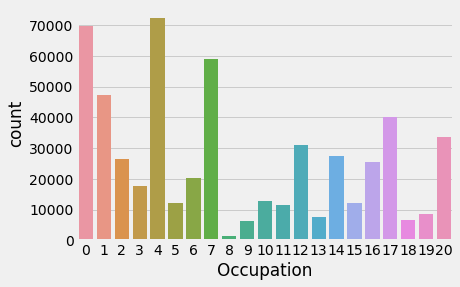

In [35]:
sns.countplot(df['Occupation'])

### Plotting a count plot for 'Product_Category_1'

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

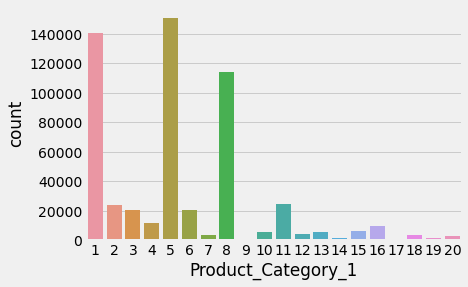

In [36]:
sns.countplot(df['Product_Category_1'])

### Plotting a count plot for 'Product_Category_2'

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

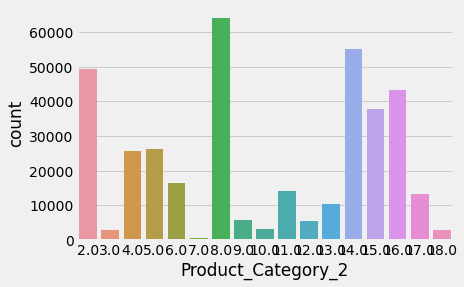

In [37]:
sns.countplot(df['Product_Category_2'])

### Plotting a count plot for 'Product_Category_3'

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

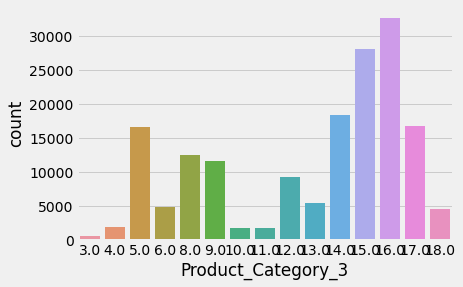

In [38]:
sns.countplot(df['Product_Category_3'])

### Plot for Occupation and Purchase Analysis

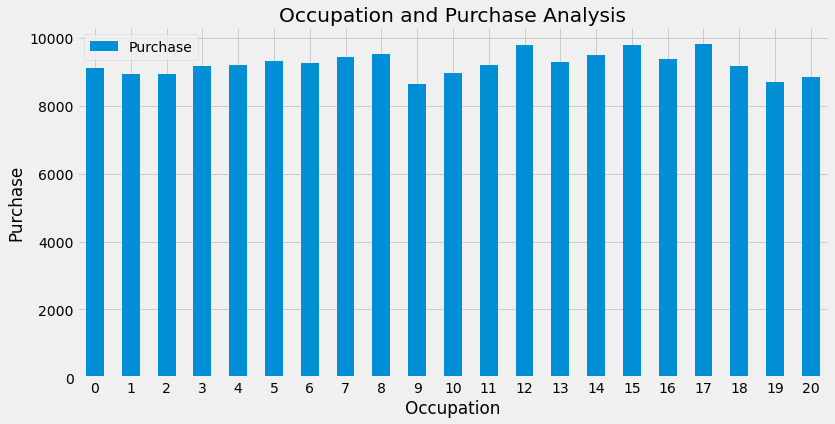

In [44]:
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(12, 6))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

### Plot for Age and Purchase Analysis

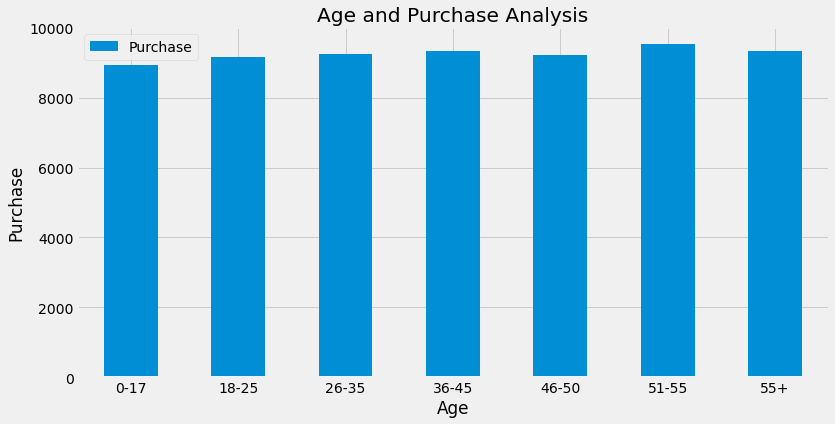

In [45]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

### Plot for Product_Category_1 and Purchase against Purchase

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

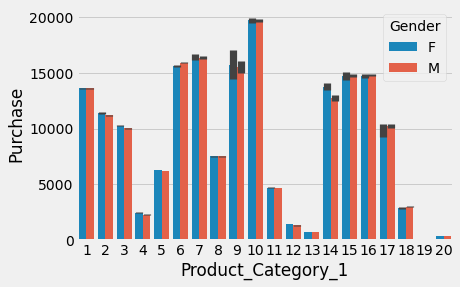

In [52]:
sns.barplot("Product_Category_1","Purchase",hue='Gender',data=df)

### Plot for Product_Category_2 and Purchase against Purchase

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

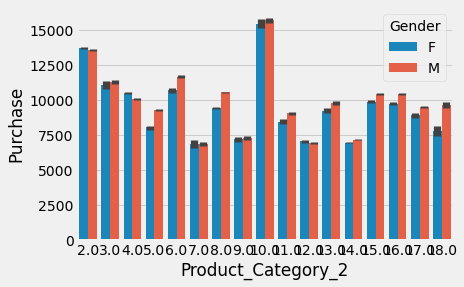

In [55]:
sns.barplot("Product_Category_2","Purchase",hue='Gender',data=df)

### Plot for Product_Category_3 and Purchase against Purchase

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

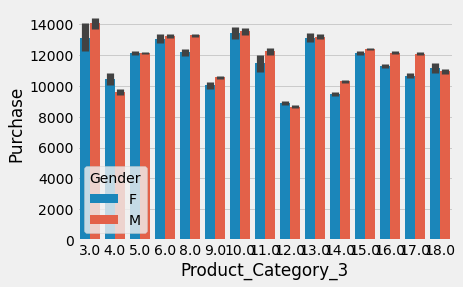

In [56]:
sns.barplot("Product_Category_3","Purchase",hue='Gender',data=df)

## 2. Interesting relations in our dataset.<br>

- Less purchases are made for price range greater than 9,000\$.
- Most of the customers shop around 6,500\$ - 9,000\$.
- By looking at count plot of 'Gender', looks like very less number of females attended the black friday sale. But it could also mean less number of females paid for the products and may be their spouse paid for them.
- It seems like the majority of the population in the ages group 26-35 attended the sale.
- Majority of the buyers are single.
- Married males paying in range 46-55 are comparatively more than married females. So it could also imply that though ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more.
- Higher number of purchases are made in the urban area which also implies more population in the area.
- Most buyers have one year living in the city.
- Occupation 8 has extremely low count compared with the others, it can be alomost negligible whilst the calculation since it won't affect much the result.
- Majority of the products are in category 1, 5 and 8.
- Irrespective of occupation the proportion of products being purchased is generic. i.e. category 1, 5 are most bought by customers of any occupation and similarly, 13-18 categories are bought in less numbers compared to other products.
- If we look at category 1, it is most bought by customers with 8, 17, 5 occupations. This can be used when recommending a product on a platform where occupation of user is known. Few observation can be done for other categories, as we don't actually know what those categories represent.
- Product_Category_2 and Product_Category_3 have lower number of samples than Product_Category_1, both could be sub categories.
- Attributes containing many unique values are of numerical type. The remaining attributes are of categorical type.

## 3. Predictions to be made
- Analyzing data for research 
    - During the Black Friday sale, who is more inclined to spend more money?
        - Men or Women
        - Married or Unmarried
        - Old Residents or new residents 
    - Which type of products are more likely to be sold in a sale like black Friday?
    - Which type of products are purchased most by men and which by women?
- Prediction
    - Predict Age of a customer based on the rest of available data.
    - Predict gender of a customer based on rest of data.
    - Predict amount of purchase based on rest of data.
- Suggestions that can be made from the predictions we make
     - Suggest products based on age.
     - Suggest products based on location customers belong to.
     - Suggest products based on gender.

## 4.Preprocessing the dataset

## Coorelation Matrix showing correlation coefficients between variables.

<AxesSubplot:>

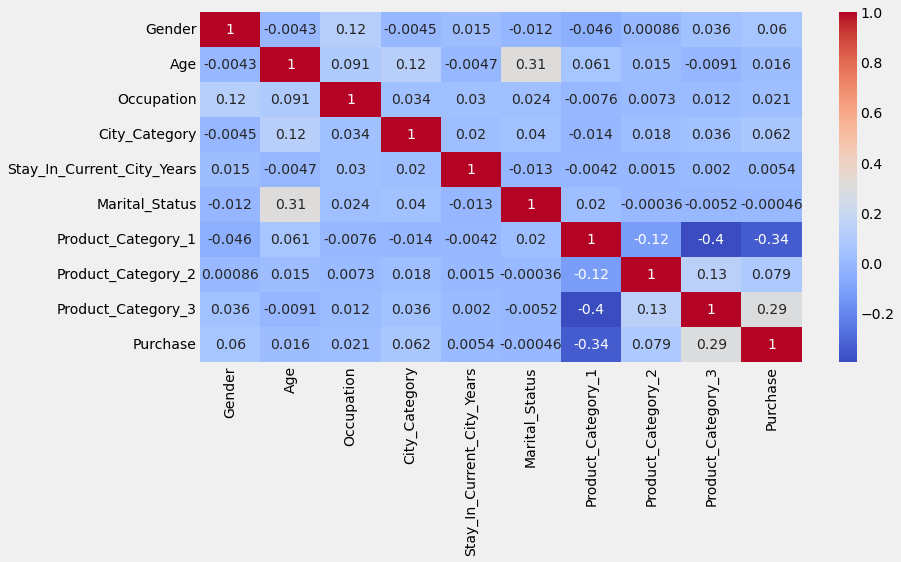

In [83]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Checking for Null Values

In [61]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
combined_G_M                       0
dtype: int64

## Filling the Null values in the dataset

In [63]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")
# Replacing the NULL values with a negative value, so that the results will not get affected.

In [64]:
df.isnull().sum()
#checking the NULL values again

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
combined_G_M                  0
dtype: int64

## Converting the values in 'Gender' column to numericals

In [68]:
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()
# Converting all the F values to numeic 0 and M values to numeric 1, using dictionary

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370,F_0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422,F_0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057,F_0
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969,M_0


## Level Encoding- Converting all the data values into numericals

In [79]:
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370,F_0
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422,F_0
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057,F_0
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969,M_0


## Droping columns with unique value

In [81]:
df = df.drop(["User_ID","Product_ID"],axis=1)

X = df.drop("Purchase",axis=1)
Y = df['Purchase']
# Removing 'User_ID' and 'Product_ID' for better results, if not the results will be biased to User_ID or Product_ID 
# Removing 'Purchase' from X, as it is an output data

## 5. Creating training and testing datasets

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=42, test_size=0.25)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (412551, 10)
x_test shape: (137517, 10)
y_train shape: (412551,)
y_test shape: (137517,)
